In [138]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# Reading data for 3 resolutions

In [139]:
res=[1,2,3]

datam=[]
databeta=[]
datapsi=[]
dataderpsi=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    m=[]
    beta=[]
    psi=[]
    derpsi=[]
    
    #iterate over files in dir
    for i in range(count):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i), header=None, dtype = str)
        df = df.to_numpy()
        df = np.transpose(df)
        #print(type(df[0]))
        aux = [float(x) for x in df[0]]
        m.append(aux)
        aux = [float(x) for x in df[1]]
        beta.append(aux)
        aux = [float(x) for x in df[2]]
        psi.append(aux)
        aux = [float(x) for x in df[3]]
        derpsi.append(aux)

    # f[i] is the array of the values of m on the whole grid on time step i
    
    print('len(m) = ', len(m))

    print('len(m[0]) = ', len(m[0]))
    
    datam.append(m)
    databeta.append(beta)
    datapsi.append(psi)
    dataderpsi.append(derpsi)

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1 is:  201
len(m) =  201
len(m[0]) =  107
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2 is:  401
len(m) =  401
len(m[0]) =  207
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3
File count in dir /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res3 is:  801
len(m) =  801
len(m[0]) =  407


In [140]:
print(datam[0][0][1]) # datam indexes give res, time then gridpoint

-2.6150414908151282e-11


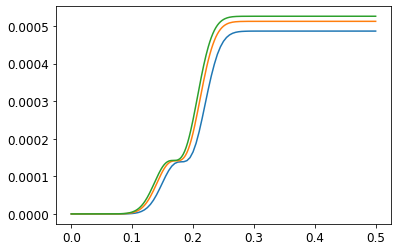

In [142]:
import math

dx1 = 0.005 # this is the dx when the grid has resolution 1
dx2= 0.0025
dx3= 0.00125

plt_x1 = np.linspace(0, 100, 101) * dx1
plt_x2 = np.linspace(0, 100*2, 100*2+1) * dx2
plt_x3 = np.linspace(0, 100*4, 100*4+1) * dx3

plt.plot(plt_x1,datam[0][0][3:len(datam[0][0])-3])
plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [143]:
plt.rcParams.update({'font.size': 12})

# Plotting data with resolutions 1 and 2 and differences 

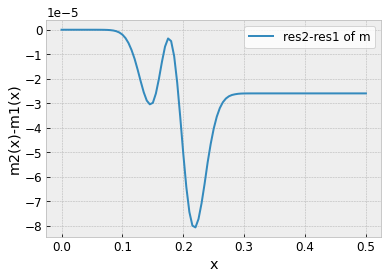

In [144]:
# for given t
t1=0 #last timestep
t2=2*t1
t3=4*t1
auxm = []
auxbeta = []
auxpsi = []
auxderpsi = []

for i in range(len(datam[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxm.append(datam[1][t2][i])
        auxbeta.append(databeta[1][t2][i])
        auxpsi.append(datapsi[1][t2][i])
        auxderpsi.append(dataderpsi[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(datam[0][t1][3:len(datam[0][t1])-3],auxm))
diffs_2_1.append(np.subtract(databeta[0][t1][3:len(databeta[0][t1])-3],auxbeta))
diffs_2_1.append(np.subtract(datapsi[0][t1][3:len(datapsi[0][t1])-3],auxpsi))
diffs_2_1.append(np.subtract(dataderpsi[0][t1][3:len(dataderpsi[0][t1])-3],auxderpsi))



with plt.style.context('bmh'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of m')

plt.legend()
plt.xlabel('x')
plt.ylabel('m2(x)-m1(x)')
plt.show()

Resolution 4

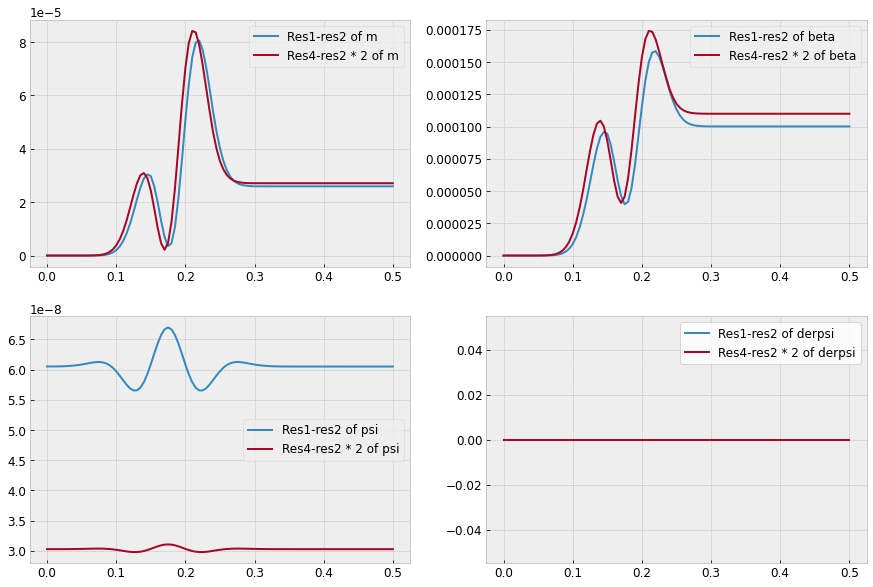

In [145]:
# for given t

aux2m = []
aux2beta = []
aux2psi = []
aux2derpsi = []
for i in range(len(datam[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(datam[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2m.append(datam[2][t3][i])
        aux2beta.append(databeta[2][t3][i])
        aux2psi.append(datapsi[2][t3][i])
        aux2derpsi.append(dataderpsi[2][t3][i])
        


#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxm,aux2m))
diffs_4_2.append(np.subtract(auxbeta,aux2beta))
diffs_4_2.append(np.subtract(auxpsi,aux2psi))
diffs_4_2.append(np.subtract(auxderpsi,aux2derpsi))

with plt.style.context('bmh'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))

    ax[0][0].plot(plt_x1, abs(diffs_2_1[0]), label='Res1-res2 of m')
    ax[0][0].plot(plt_x1, abs(diffs_4_2[0])*2, label='Res4-res2 * 2 of m')
    ax[0][0].legend()
    
    ax[0][1].plot(plt_x1, abs(diffs_2_1[1]), label='Res1-res2 of beta')
    ax[0][1].plot(plt_x1, abs(diffs_4_2[1])*2, label='Res4-res2 * 2 of beta')
    ax[0][1].legend()
    
    ax[1][0].plot(plt_x1, abs(diffs_2_1[2]), label='Res1-res2 of psi')
    ax[1][0].plot(plt_x1, abs(diffs_4_2[2])*2, label='Res4-res2 * 2 of psi')
    ax[1][0].legend()
    
    ax[1][1].plot(plt_x1, abs(diffs_2_1[3]), label='Res1-res2 of derpsi')
    ax[1][1].plot(plt_x1, abs(diffs_4_2[3])*2, label='Res4-res2 * 2 of derpsi')
    ax[1][1].legend()

plt.legend()
plt.show()



# Pointwise convergence tests: plots for thesis project report 

# L2 norm convergence tests

In [146]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(4):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

In [147]:
print("m convergence factor:")
print(norm_low_med[0]/norm_med_high[0])
print("")

print("beta convergence factor:")
print(norm_low_med[1]/norm_med_high[1])
print("")

print("psi convergence factor:")
print(norm_low_med[2]/norm_med_high[2])
print("")

print("derpsi convergence factor:")
print(norm_low_med[3]/norm_med_high[3])
print("")


m convergence factor:
1.9137471669961938

beta convergence factor:
1.8103029185937773

psi convergence factor:
3.9984596606333542

derpsi convergence factor:
nan



/tmp/ipykernel_9283/2546517833.py:14: RuntimeWarning: invalid value encountered in double_scalars
  print(norm_low_med[3]/norm_med_high[3])


In [96]:
m convergence factor:
2.0191504393867388

beta convergence factor:
1.9484055714946673

psi convergence factor:
15.504254397877508

derpsi convergence factor:
nan

SyntaxError: invalid syntax (1706307161.py, line 1)